In [14]:
!pip install streamlit replicate

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/d3/96/9251b421d0a1c7d625a82a04bea56b8a9830c785940ec16db454b85c6db7/streamlit-1.29.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow>=6.0 from https://files.pythonhosted.org/packages/f3/0e/622d600e1dbaa0b59d9c6aa2b799902e3b0d1e853e813480092b3b5c1f6d/pyarrow-14.0.1-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36c

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import tensorflow as tf

In [2]:
# Importaciones necesarias
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# creo la variable TRAIN_PATH con la ruta del directorio que contiene los datos de entrenamiento
TRAIN_PATH = '../Proyecto Mlearning/DataSet/Training'

# ImageDataGenerator con los parámetros de data augmentation para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # porcentaje para validación ----> dejo el 20%
)

# Crear un ImageDataGenerator para la validación
validation_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    validation_split=0.2  # Especificar el mismo porcentaje que para el entrenamiento
)

# generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training', 
    seed=123
)

# Crear el generador de datos de validación
validation_generator = validation_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',  # Especificar el subset de validación
    seed=123
)

# Construcción del modelo 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), 
    Dropout(0.5),  
    Dense(4, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size
)



Found 3122 images belonging to 4 classes.
Found 1039 images belonging to 4 classes.
Epoch 1/15
48/48 [==============================] - 62s 1s/step - loss: 5.4125 - accuracy: 0.6272 - val_loss: 1.0630 - val_accuracy: 0.7754
Epoch 2/15
48/48 [==============================] - 74s 2s/step - loss: 0.9644 - accuracy: 0.7714 - val_loss: 0.7378 - val_accuracy: 0.7764
Epoch 3/15
48/48 [==============================] - 60s 1s/step - loss: 0.7426 - accuracy: 0.8146 - val_loss: 0.5804 - val_accuracy: 0.9971
Epoch 4/15
48/48 [==============================] - 69s 1s/step - loss: 0.6255 - accuracy: 0.8551 - val_loss: 0.5578 - val_accuracy: 0.9951
Epoch 5/15
48/48 [==============================] - 73s 2s/step - loss: 0.5341 - accuracy: 0.8708 - val_loss: 0.4249 - val_accuracy: 0.9971
Epoch 6/15
48/48 [==============================] - 61s 1s/step - loss: 0.4915 - accuracy: 0.8751 - val_loss: 0.3635 - val_accuracy: 0.9492
Epoch 7/15
48/48 [==============================] - 63s 1s/step - loss: 0.45

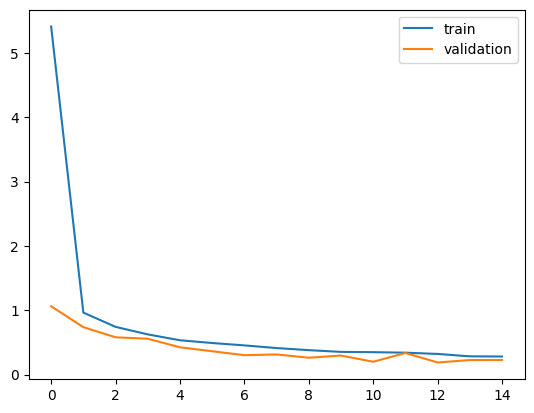

In [3]:
# graficar modelo
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar la imagen de prueba
img_path = 'DataSet/TetsY/guante.jpg'  # Reemplaza con la ruta de tu imagen de prueba
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar los valores de píxeles al rango [0, 1]

# Realizar la predicción
predictions = model.predict(img_array)

# Obtener la clase predicha
predicted_class = np.argmax(predictions)

confidence = predictions[0, predicted_class]

# Definir un umbral de confianza
umbral_confianza = 0.74

# Verificar si la confianza supera el umbral
if confidence >= umbral_confianza:
    # Imprimir el resultado si la confianza es suficiente
    classes = ['limones', 'mandarinas', 'pomelos', 'naranjas']
    print(f"Clase predicha: {classes[predicted_class]} con confianza: {confidence:.2%}")
else:
    # Imprimir un mensaje si la confianza es insuficiente
    print("No estoy seguro de qué clase es esta imagen.")

1/1 [==============================] - 0s 84ms/step
Clase predicha: limones con confianza: 99.69%


In [142]:
predictions



array([[1.4290241e-04, 3.2309623e-04, 9.9953389e-01, 1.6795829e-07]],
      dtype=float32)